In [408]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
import statsmodels.api as sm

In [409]:
df = pd.read_csv("logistic_regression.csv")

**Problem statement** : 

- **Primary Goal** 
 - Recognizing **significant features** that will **identify the factors are important in approval of Personal Loan**
 - Recognizing **factors are interrelated among themselves**
 - Determine if a **credit line should be extended to Personal loan applicant**. 
 - If loan approved, what should the **repayment terms be in business recommendations**?
         
- **Statistical summary**
 - More **likelihood of personal loan admission**
 - Analysis of Strength vs Areas of Improvements
 - Recommending target class for Personal loan applicant

- **Long term benefits** : Revenue , Personal loan acquisition without defaulting 

### Basic Analysis

- **Analysing metrics** - Basic metrics
 - Observations on **shape** of data
 - **Data types** of all the attributes
 - **Conversion** of categorical attributes to 'category' (If required)
 - **Structure & characteristics** of the dataset
 - Statistical summary

In [410]:
df.shape

(396030, 27)

In [411]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [412]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


- **Conclusion** 
 - Large sample size
 - Address is text feature , needs to use feature engineering such as : 
     - Extract geo-location e.g. OK , SD, MA etc.
     - Extract Pin code
     - Post feature engineering we can drop address (incase we're not using NLP based text analysis techniques)

In [413]:
display(df.describe())

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


- **Observations** 
 - int_rate ranges from 5.32(min) to 30 (max) , with average 10.49
 - There are outliers for dti,open_acc,pub_rec,revol_until,total_acc,mort_acc

## Data Preprocessing - Part 1

### Duplicate value check

In [414]:
duplicate = df[df.duplicated()]
duplicate

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address


**Observation** - **No duplicate values present** 

### Missing Value Detection

In [415]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False)

,column_name,percent_missing
mort_acc,mort_acc,9.543469
emp_title,emp_title,5.789208
emp_length,emp_length,4.621115
title,title,0.443148
pub_rec_bankruptcies,pub_rec_bankruptcies,0.135091
revol_util,revol_util,0.069692
loan_amnt,loan_amnt,0.000000
dti,dti,0.000000
application_type,application_type,0.000000
initial_list_status,initial_list_status,0.000000


- **Insights** : 
 - There are missing values for following features
     - mort_acc (9.5%),emp_title (5.7%),emp_length,title(4.6%)
 - Negligible missing values for following features
     - pub_rec_bankruptcies (0.44%),revol_util(0.13%)

### Missing Value Treatment (Part 1)

#### Categorical missing value treatment - Avoiding bias (creating a unknown category for target encoding)

In [416]:
df["emp_title"] = df["emp_title"].fillna("Unknown")
df["emp_length"] = df["emp_length"].fillna("Unknown")
df["title"] = df["title"].fillna("Unknown")

### Filtering features by data type

#### Numerical features

In [417]:
continious_features = df.select_dtypes(include=['int64','float64']).columns
continious_features

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

#### Categorical features

In [418]:
categorical_features = df.select_dtypes(include=['object']).columns
categorical_features

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

### Non-Graphical Analysis (Part 1)

In [419]:
df['term'].value_counts(normalize=True)*100

 36 months    76.258112
 60 months    23.741888
Name: term, dtype: float64

- **Insights**:
    - **Less term loans are more likely to fully pay the loan**

In [420]:
df['grade'].value_counts(normalize=True)*100

B    29.295255
C    26.762366
A    16.207611
D    16.040199
E     7.950913
F     2.972502
G     0.771154
Name: grade, dtype: float64

In [421]:
df['sub_grade'].value_counts(normalize=True)*100

B3    6.730551
B4    6.464409
C1    5.974800
C2    5.701588
B2    5.680125
B5    5.576598
C3    5.358432
C4    5.120824
B1    4.843572
A5    4.677928
C5    4.606722
D1    4.038330
A4    3.986819
D2    3.522713
D3    3.086382
D4    2.943464
A3    2.670505
A1    2.456632
D5    2.449309
A2    2.415726
E1    1.999091
E2    1.876373
E3    1.567306
E4    1.353685
E5    1.154458
F1    0.892862
F2    0.698432
F3    0.577229
F4    0.451228
F5    0.352751
G1    0.267151
G2    0.190390
G3    0.139383
G4    0.094437
G5    0.079792
Name: sub_grade, dtype: float64

In [422]:
df['emp_title'].value_counts(normalize=True)*100

Unknown                    5.789208
Teacher                    1.108249
Manager                    1.073151
Registered Nurse           0.468651
RN                         0.466126
                             ...   
Postman                    0.000253
McCarthy & Holthus, LLC    0.000253
jp flooring                0.000253
Histology Technologist     0.000253
Gracon Services, Inc       0.000253
Name: emp_title, Length: 173106, dtype: float64

- **Insights**:
    - **Majority People have unknown /missing job title**
    - **"Registered Nurse" and "RN" are same or diffrent job title**, needs to be consulted for data cleanup
    - Need to consult with domain expert for further data processing 

In [423]:
df['emp_length'].value_counts(normalize=True)*100

10+ years    31.826124
2 years       9.046537
< 1 year      8.010757
3 years       7.995606
5 years       6.690150
1 year        6.535363
4 years       6.048027
6 years       5.262480
7 years       5.256925
8 years       4.840037
Unknown       4.621115
9 years       3.866879
Name: emp_length, dtype: float64

- **Insights**:
    - **People have more than 10 year employment, more likely to fully pay the loan**

In [424]:
df['home_ownership'].value_counts(normalize=True)*100

MORTGAGE    50.084085
RENT        40.347953
OWN          9.531096
OTHER        0.028281
NONE         0.007828
ANY          0.000758
Name: home_ownership, dtype: float64

- **Insights**:
    - **The majority of people have home ownership as Mortgage**

In [425]:
df['verification_status'].value_counts(normalize=True)*100

Verified           35.240512
Source Verified    33.175517
Not Verified       31.583971
Name: verification_status, dtype: float64

In [426]:
df['issue_d'].value_counts(normalize=True)*100

Oct-2014    3.748706
Jul-2014    3.183850
Jan-2015    2.955584
Dec-2013    2.681110
Nov-2013    2.650304
              ...   
Jul-2007    0.006565
Sep-2008    0.006313
Nov-2007    0.005555
Sep-2007    0.003788
Jun-2007    0.000253
Name: issue_d, Length: 115, dtype: float64

In [427]:
df['purpose'].value_counts(normalize=True)*100

debt_consolidation    59.214453
credit_card           20.962806
home_improvement       6.067722
other                  5.349342
major_purchase         2.219529
small_business         1.439537
car                    1.186021
medical                1.059516
moving                 0.720652
vacation               0.619145
house                  0.555766
wedding                0.457541
renewable_energy       0.083075
educational            0.064894
Name: purpose, dtype: float64

In [428]:
df['title'].value_counts(normalize=True)*100

Debt consolidation            38.500114
Credit card refinancing       13.000783
Home improvement               3.854253
Other                          3.264904
Debt Consolidation             2.931091
                                ...    
Graduation/Travel Expenses     0.000253
Daughter's Wedding Bill        0.000253
gotta move                     0.000253
creditcardrefi                 0.000253
Toxic Debt Payoff              0.000253
Name: title, Length: 48817, dtype: float64

In [429]:
df['earliest_cr_line'].value_counts(normalize=True)*100

Oct-2000    0.761811
Aug-2000    0.741105
Oct-2001    0.731258
Aug-2001    0.728228
Nov-2000    0.690857
              ...   
Jul-1958    0.000253
Nov-1957    0.000253
Jan-1953    0.000253
Jul-1955    0.000253
Aug-1959    0.000253
Name: earliest_cr_line, Length: 684, dtype: float64

In [430]:
df['initial_list_status'].value_counts(normalize=True)*100

f    60.113123
w    39.886877
Name: initial_list_status, dtype: float64

In [431]:
df['application_type'].value_counts(normalize=True)*100

INDIVIDUAL    99.820468
JOINT          0.107315
DIRECT_PAY     0.072217
Name: application_type, dtype: float64

In [432]:
df['loan_status'].value_counts(normalize=True)*100

Fully Paid     80.387092
Charged Off    19.612908
Name: loan_status, dtype: float64

In [533]:
df['loan_status'].value_counts()

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

- **Observation**
    - **80 % percentage of customers have fully paid their Loan Amount**
    - There is imbalance target class (80:20)

### Imbalance Data  - No sample data Imputation (Strategy # 1)

In sample data, we have 318357 (80%) Fully Paid (1) samples and 77673(19.6%) Charged Off (0) samples.
Now if there is a hyperplane Π that separates the dataset,
Recall, how in logistic regression, we minimize the loss function which was the summation of log-loss over the entire data 
sample (n).

Loss =  ∑i=ni=1loglossi 
But since +ve class samples much greater than -ve class samples, that will the effect on the loss function.
The +ve class sampled data dominates the loss functions
This makes the hyperplane Π to be pushed away from the +ve class data points
Since the +ve class labels will want to be as further away from the hyperplane as possible.
thus the model favors +ve class label points and ignores the -ve class label
Notice, that how Imbalance data effects Logistic Regression model,


## **Weighted Loss**
#### Now that we know, imbalance data impacts model performance , is there a way to handle imbalance data ?

We notice how Imbalance data causes issues on the loss function.


### **Can we manupilate the loss function such that it incooporates Imbalance data case too ?**
-  We can use class-weight to the log-loss function which will be a constant
 - loss = $∑_{i=1}^{i=1000}logloss_i .w_i$

#### how to calculate this class-weight ?
- we see , we have 80% +ve class samples and 20% -ve class samples.
- Hence $w_i$ can be defined as the ratio of class with more number of samples to the class with less number of samoples $ w_i = \frac{80}{20} ≈ 4 $  

- Since -ve class has less samples, we say $w_i = 4$
- And for +ve class, we say $w_i = 1$ 


Note: this approach is done on the model parameters.


### Imbalance Data  - with Data Imputation (Strategy # 2) [Oversampling vs Undersampling vs SMOTE]

- **Undersampling** 
    - Selecting majority class in equal proportion to minority class 
    - Will reduce data points of majority class that causes information loss
    - Hence **not a best strategy** , specially when we've rich large sample available  
- **Oversampling**
    - Replicating the samples of the -ve labels such that it becomes almost same as the +ve labels
    - It will cause fabrication of data , which will **tend to overfitted model** 
- **SMOTE**
    - In oversampling, we are simply repeating the data
    - But using SMOTE we are **synthetically creating new data**
    - **Second best strategy to deal with imbalance data**

### Visual Analysis (Part 1)

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

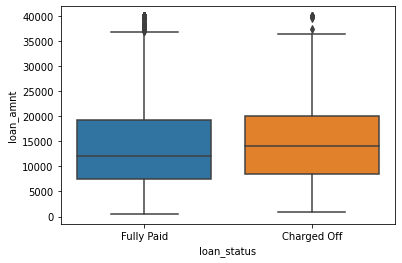

In [433]:
sns.boxplot(x="loan_status", y="loan_amnt", data=df)

<AxesSubplot:xlabel='loan_status', ylabel='int_rate'>

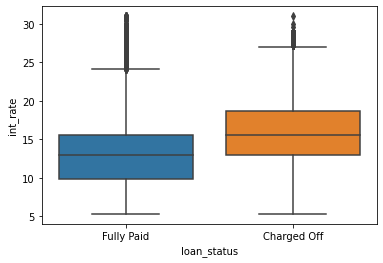

In [434]:
sns.boxplot(x="loan_status", y='int_rate', data=df)

<AxesSubplot:xlabel='loan_status', ylabel='installment'>

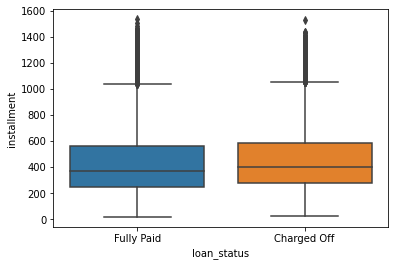

In [435]:
sns.boxplot(x="loan_status", y='installment', data=df)

<AxesSubplot:xlabel='loan_status', ylabel='annual_inc'>

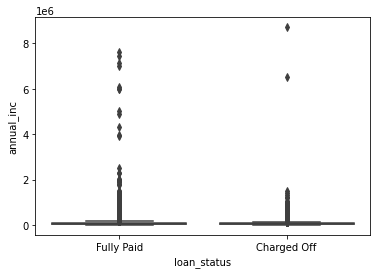

In [436]:
sns.boxplot(x="loan_status", y='annual_inc', data=df)

<AxesSubplot:xlabel='loan_status', ylabel='dti'>

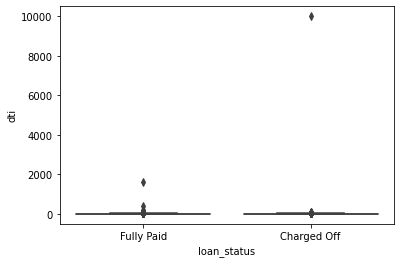

In [437]:
sns.boxplot(x="loan_status", y='dti', data=df)

<AxesSubplot:xlabel='loan_status', ylabel='open_acc'>

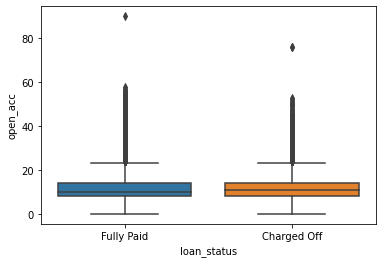

In [438]:
sns.boxplot(x="loan_status", y='open_acc', data=df)

<AxesSubplot:xlabel='loan_status', ylabel='pub_rec'>

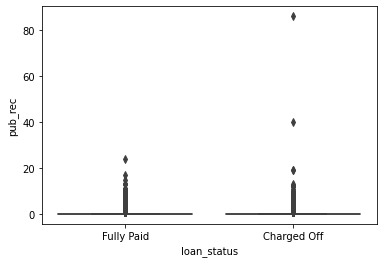

In [439]:
sns.boxplot(x="loan_status", y='pub_rec', data=df)

<AxesSubplot:xlabel='loan_status', ylabel='revol_bal'>

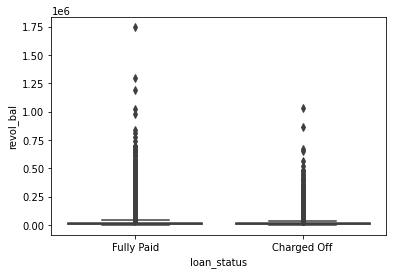

In [440]:
sns.boxplot(x="loan_status", y='revol_bal', data=df)

<AxesSubplot:xlabel='loan_status', ylabel='revol_util'>

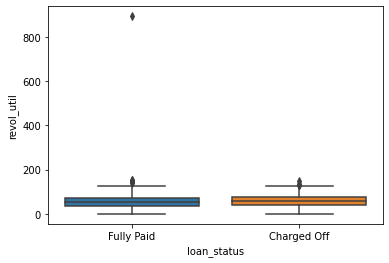

In [441]:
sns.boxplot(x="loan_status", y='revol_util', data=df)

<AxesSubplot:xlabel='loan_status', ylabel='total_acc'>

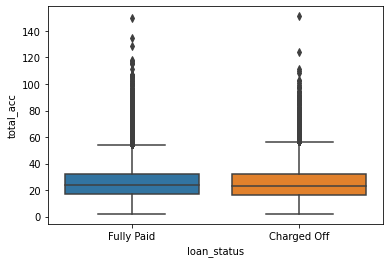

In [442]:
sns.boxplot(x="loan_status", y='total_acc', data=df)

<AxesSubplot:xlabel='loan_status', ylabel='mort_acc'>

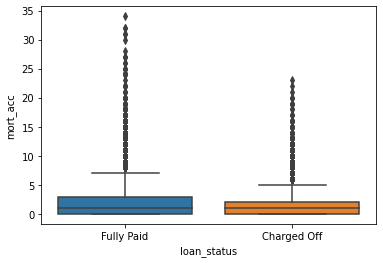

In [443]:
sns.boxplot(x="loan_status", y='mort_acc', data=df)

<AxesSubplot:xlabel='loan_status', ylabel='pub_rec_bankruptcies'>

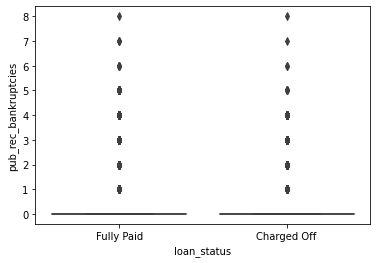

In [444]:
sns.boxplot(x="loan_status", y='pub_rec_bankruptcies', data=df)

- **Observation** 
 - **'loan_amnt' and 'int_rate' have impact on loan status** 
 - **High outliers on all categorical features vs loan status**

### Feature Engineering (Part 1)

- **Simple Feature Engineering**:
E.g.: Creation of Flags- If value greater than 1.0 then 1 else 0. This can be done on:

    - 1. **Pub_rec**
    - 2. **Mort_acc**
    - 3. **Pub_rec_bankruptcies**

In [445]:
def categorization(x):
    if x >= 1:
        return 1
    else:
        return 0

In [446]:
df["pub_rec"] = df["pub_rec"].apply(categorization)
df["mort_acc"] = df["mort_acc"].apply(categorization)
df["pub_rec_bankruptcies"] = df["pub_rec_bankruptcies"].apply(categorization)

In [447]:
pd.crosstab(df['loan_status'], df['pub_rec'], margins=True,normalize=True)*100

pub_rec,0,1,All
loan_status,,,
Charged Off,16.498498,3.114411,19.612908
Fully Paid,68.917254,11.469838,80.387092
All,85.415751,14.584249,100.000000


In [448]:
pd.crosstab(df['loan_status'], df['mort_acc'], margins=True,normalize=True)*100

mort_acc,0,1,All
loan_status,,,
Charged Off,9.773755,9.839154,19.612908
Fully Paid,35.064263,45.322829,80.387092
All,44.838017,55.161983,100.000000


In [449]:
pd.crosstab(df['loan_status'], df['pub_rec_bankruptcies'], margins=True,normalize=True)*100

pub_rec_bankruptcies,0,1,All
loan_status,,,
Charged Off,17.273439,2.339469,19.612908
Fully Paid,71.334747,9.052345,80.387092
All,88.608186,11.391814,100.000000


#### Income to Income-groups

In [450]:
def income_group_categorization(x):
    if x <= 32000:
        return "Average"
    elif 32000 < x < 77500:
        return "Middle"
    else:
        return "Upper"

In [451]:
df["annual_inc_group"] = df["annual_inc"].apply(income_group_categorization)

In [452]:
df["annual_inc_group"].value_counts()

Middle     223639
Upper      137459
Average     34932
Name: annual_inc_group, dtype: int64

In [453]:
pd.crosstab(df['loan_status'], df['annual_inc_group'], margins=True,normalize=True)*100

annual_inc_group,Average,Middle,Upper,All
loan_status,,,,
Charged Off,2.242507,11.911471,5.458930,19.612908
Fully Paid,6.578037,44.558746,29.250309,80.387092
All,8.820544,56.470217,34.709239,100.000000


- **Observation** 
 - **73.75% of Middle and upper earning groups are able to fully pay the loan** 

#### Feature Engineering - Address (Extracting location and pincode)

In [454]:
df["pincode"] = df["address"].str.split().str[-1].fillna('UNKOWN_PINCODE')
df["location"] = df["address"].str.split().str[-2].fillna('UNKOWN_LOCATION')

In [455]:
df["pincode"].value_counts()

70466    56985
30723    56546
22690    56527
48052    55917
00813    45824
29597    45471
05113    45402
11650    11226
93700    11151
86630    10981
Name: pincode, dtype: int64

In [456]:
df["location"].value_counts()

AP    14308
AE    14157
AA    13919
NJ     7091
WI     7081
LA     7068
NV     7038
AK     7034
MA     7022
VA     7022
VT     7005
NY     7004
MS     7003
TX     7000
SC     6973
ME     6972
AR     6969
OH     6969
GA     6967
ID     6958
IN     6958
KS     6945
WV     6944
RI     6940
MO     6939
IL     6934
WY     6933
NE     6927
HI     6927
IA     6926
FL     6921
AZ     6918
CO     6914
OK     6911
CT     6904
MN     6904
NC     6901
OR     6898
CA     6898
AL     6898
MD     6896
WA     6895
UT     6887
SD     6887
MT     6883
DE     6874
TN     6869
ND     6858
MI     6854
DC     6842
NM     6842
PA     6825
NH     6818
KY     6800
Name: location, dtype: int64

#### Dropping address after feature extraction

In [457]:
df.drop(["address"], axis=1, inplace=True)

#### Label encoding of Target categorical feature 

In [458]:
df["loan_status"].value_counts()

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

In [459]:
from sklearn.preprocessing import LabelEncoder
# Running level encoding for convertion from categorical to numerical data 
# Using level encording for sex and smoker features as there are only two levels 
label_encoder = LabelEncoder()

col='loan_status'
df[col+'_new'] = label_encoder.fit_transform(df[col])

In [460]:
df["loan_status_new"].value_counts()

1    318357
0     77673
Name: loan_status_new, dtype: int64

#### Target/Response encoding of categorical features 

In [461]:
from category_encoders import TargetEncoder
# Using Target/Response encording for region features as there are more than two levels 
te = TargetEncoder()

categorical_features = ['term', 'grade', 'sub_grade', 'emp_title', 'emp_length','home_ownership', 'verification_status', 'issue_d', 'purpose', 'title', 'earliest_cr_line', 'initial_list_status','application_type','pub_rec','mort_acc','pub_rec_bankruptcies','annual_inc_group','location','pincode']
for feature in categorical_features:
    df[feature+'_new'] = te.fit_transform(df[feature],df['loan_status_new'])
    df[feature+'_new']

In [462]:
selected_encoded_columns = df.loc[:,df.columns.str.endswith('_new')].columns
selected_encoded_columns

Index(['loan_status_new', 'term_new', 'grade_new', 'sub_grade_new',
       'emp_title_new', 'emp_length_new', 'home_ownership_new',
       'verification_status_new', 'issue_d_new', 'purpose_new', 'title_new',
       'earliest_cr_line_new', 'initial_list_status_new',
       'application_type_new', 'pub_rec_new', 'mort_acc_new',
       'pub_rec_bankruptcies_new', 'annual_inc_group_new', 'location_new',
       'pincode_new'],
      dtype='object')

In [463]:
selected_features = selected_encoded_columns.append(continious_features)
selected_features

Index(['loan_status_new', 'term_new', 'grade_new', 'sub_grade_new',
       'emp_title_new', 'emp_length_new', 'home_ownership_new',
       'verification_status_new', 'issue_d_new', 'purpose_new', 'title_new',
       'earliest_cr_line_new', 'initial_list_status_new',
       'application_type_new', 'pub_rec_new', 'mort_acc_new',
       'pub_rec_bankruptcies_new', 'annual_inc_group_new', 'location_new',
       'pincode_new', 'loan_amnt', 'int_rate', 'installment', 'annual_inc',
       'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies'],
      dtype='object')

In [481]:
df_selected = df[selected_features]
df_selected.head()

,loan_status_new,term_new,grade_new,sub_grade_new,emp_title_new,emp_length_new,home_ownership_new,verification_status_new,issue_d_new,purpose_new,...,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
0,1,0.842254,0.874270,0.861607,0.752809,0.815814,0.773378,0.853640,0.747971,0.810767,...,329.48,117000.0,26.24,16.0,0,36369.0,41.8,25.0,0,0
1,1,0.842254,0.874270,0.844963,0.683022,0.807615,0.830439,0.853640,0.747971,0.792586,...,265.68,65000.0,22.05,17.0,0,20131.0,53.3,27.0,1,0
2,1,0.842254,0.874270,0.876646,0.818181,0.793128,0.773378,0.785257,0.747971,0.832882,...,506.97,43057.0,12.79,13.0,0,11987.0,92.2,26.0,0,0
3,1,0.842254,0.937121,0.951814,0.803871,0.810806,0.773378,0.853640,0.753443,0.832882,...,220.65,54000.0,2.60,6.0,0,5472.0,21.5,13.0,0,0
4,0,0.680585,0.788191,0.754933,0.803871,0.799530,0.830439,0.776789,0.838881,0.832882,...,609.33,55000.0,33.95,13.0,0,24584.0,69.8,43.0,1,0


### Outlier Detection &  Treatment Consideration

 **Checking Outliers using Visual plots**

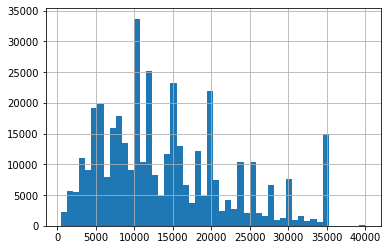

In [482]:
df_selected['loan_amnt'].hist(bins=50);

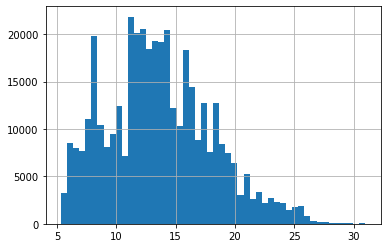

In [483]:
df_selected["int_rate"].hist(bins=50);

- **Checking Outliers using statistical methods**

In [484]:
column_name = "loan_status_new" 

Q1=df_selected[column_name].quantile(0.25)
Q3=df_selected[column_name].quantile(0.75)

IQR=Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

lower_outliers = df_selected[(df_selected[column_name]<= lower)]
upper_outliers = df_selected[(df_selected[column_name]>= upper)]

In [485]:
lower_outliers

,loan_status_new,term_new,grade_new,sub_grade_new,emp_title_new,emp_length_new,home_ownership_new,verification_status_new,issue_d_new,purpose_new,...,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
0,1,0.842254,0.874270,0.861607,0.752809,0.815814,0.773378,0.853640,0.747971,0.810767,...,329.48,117000.0,26.24,16.0,0,36369.0,41.8,25.0,0,0
1,1,0.842254,0.874270,0.844963,0.683022,0.807615,0.830439,0.853640,0.747971,0.792586,...,265.68,65000.0,22.05,17.0,0,20131.0,53.3,27.0,1,0
2,1,0.842254,0.874270,0.876646,0.818181,0.793128,0.773378,0.785257,0.747971,0.832882,...,506.97,43057.0,12.79,13.0,0,11987.0,92.2,26.0,0,0
3,1,0.842254,0.937121,0.951814,0.803871,0.810806,0.773378,0.853640,0.753443,0.832882,...,220.65,54000.0,2.60,6.0,0,5472.0,21.5,13.0,0,0
4,0,0.680585,0.788191,0.754933,0.803871,0.799530,0.830439,0.776789,0.838881,0.832882,...,609.33,55000.0,33.95,13.0,0,24584.0,69.8,43.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,1,0.680585,0.874270,0.861607,0.803871,0.806738,0.773378,0.785257,0.782169,0.792586,...,217.38,40000.0,15.63,6.0,0,1990.0,34.3,23.0,0,0
396026,1,0.842254,0.788191,0.826304,0.779570,0.807813,0.830439,0.785257,0.744803,0.792586,...,700.42,110000.0,21.45,6.0,0,43263.0,95.7,8.0,1,0
396027,1,0.842254,0.874270,0.901418,0.731343,0.815814,0.773378,0.776789,0.844730,0.792586,...,161.32,56500.0,17.56,15.0,0,32704.0,66.9,23.0,0,0
396028,1,0.680585,0.788191,0.802480,0.803871,0.815814,0.830439,0.776789,0.833412,0.792586,...,503.02,64000.0,15.88,9.0,0,15704.0,53.8,20.0,1,0


In [486]:
upper_outliers

,loan_status_new,term_new,grade_new,sub_grade_new,emp_title_new,emp_length_new,home_ownership_new,verification_status_new,issue_d_new,purpose_new,...,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
0,1,0.842254,0.874270,0.861607,0.752809,0.815814,0.773378,0.853640,0.747971,0.810767,...,329.48,117000.0,26.24,16.0,0,36369.0,41.8,25.0,0,0
1,1,0.842254,0.874270,0.844963,0.683022,0.807615,0.830439,0.853640,0.747971,0.792586,...,265.68,65000.0,22.05,17.0,0,20131.0,53.3,27.0,1,0
2,1,0.842254,0.874270,0.876646,0.818181,0.793128,0.773378,0.785257,0.747971,0.832882,...,506.97,43057.0,12.79,13.0,0,11987.0,92.2,26.0,0,0
3,1,0.842254,0.937121,0.951814,0.803871,0.810806,0.773378,0.853640,0.753443,0.832882,...,220.65,54000.0,2.60,6.0,0,5472.0,21.5,13.0,0,0
5,1,0.842254,0.788191,0.781584,0.793103,0.815814,0.830439,0.776789,0.749769,0.792586,...,677.07,86788.0,16.31,8.0,0,25757.0,100.6,23.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,1,0.680585,0.874270,0.861607,0.803871,0.806738,0.773378,0.785257,0.782169,0.792586,...,217.38,40000.0,15.63,6.0,0,1990.0,34.3,23.0,0,0
396026,1,0.842254,0.788191,0.826304,0.779570,0.807813,0.830439,0.785257,0.744803,0.792586,...,700.42,110000.0,21.45,6.0,0,43263.0,95.7,8.0,1,0
396027,1,0.842254,0.874270,0.901418,0.731343,0.815814,0.773378,0.776789,0.844730,0.792586,...,161.32,56500.0,17.56,15.0,0,32704.0,66.9,23.0,0,0
396028,1,0.680585,0.788191,0.802480,0.803871,0.815814,0.830439,0.776789,0.833412,0.792586,...,503.02,64000.0,15.88,9.0,0,15704.0,53.8,20.0,1,0


- **Conclusion**
 - There is high proportion of outliers 
 - Outliers, in case of Logistic Regreesion may or may not have the effect on the result/model.
 - Having Sigmoid function can reduce the effect of the outliers or even nulify them in some cases

### Correlations

Now lets look at the correlations of numerical features with each other

- **Person correlation**
 - Pearson's correlation coefficient, r, is very sensitive to outliers
 - It can have a very large effect on the line of best fit and the Pearson correlation coefficient. 
 - This means — including outliers in your analysis can lead to misleading results.

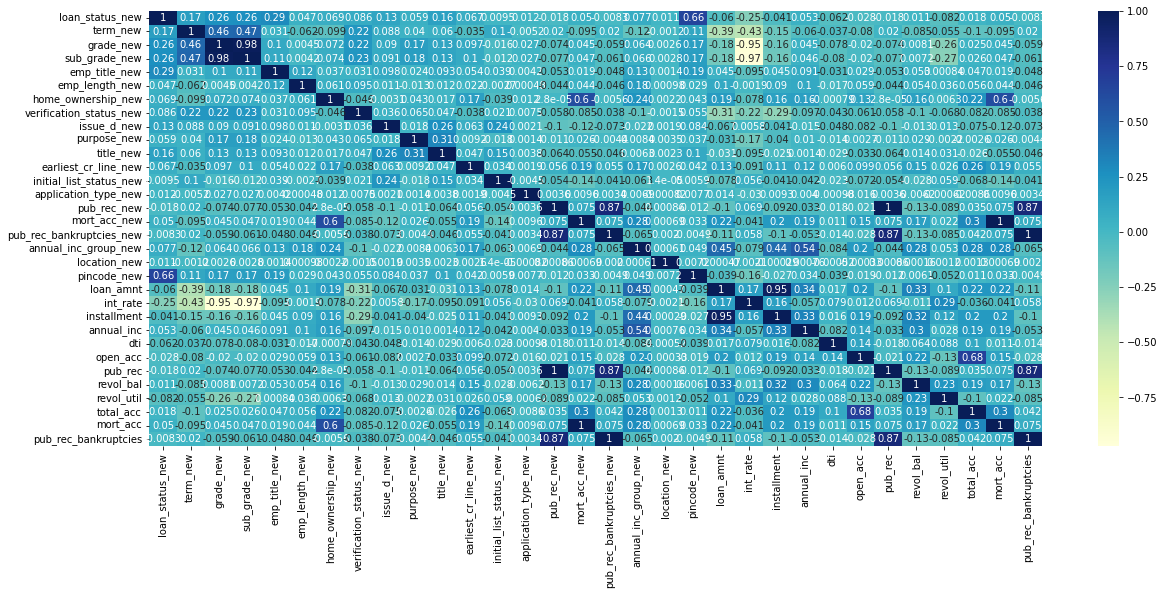

In [487]:
plt.figure(figsize=(20,8))
ax = sns.heatmap(df_selected.corr(method='pearson'), cmap="YlGnBu", annot=True)

- **Insights** : 
    - **High correlation between following features**
        - **grade and sub_grade (0.98)**
        - **intallment and loan_amount (0.95)**
        - **int_rate and sub_grade(-0.97)**
        - **int_rate and grade(-0.95)**
        - pub_rec_bankruptcies and pub_rec (0.70)
        - total_acc and open_acc (0.68)
        - Pincode and loan status
        - mortal_acc and home_ownership (0.7)

- **Spearman correlation** - Better measure if there are multiple outliers in each groups. But we're good as there are no outliers

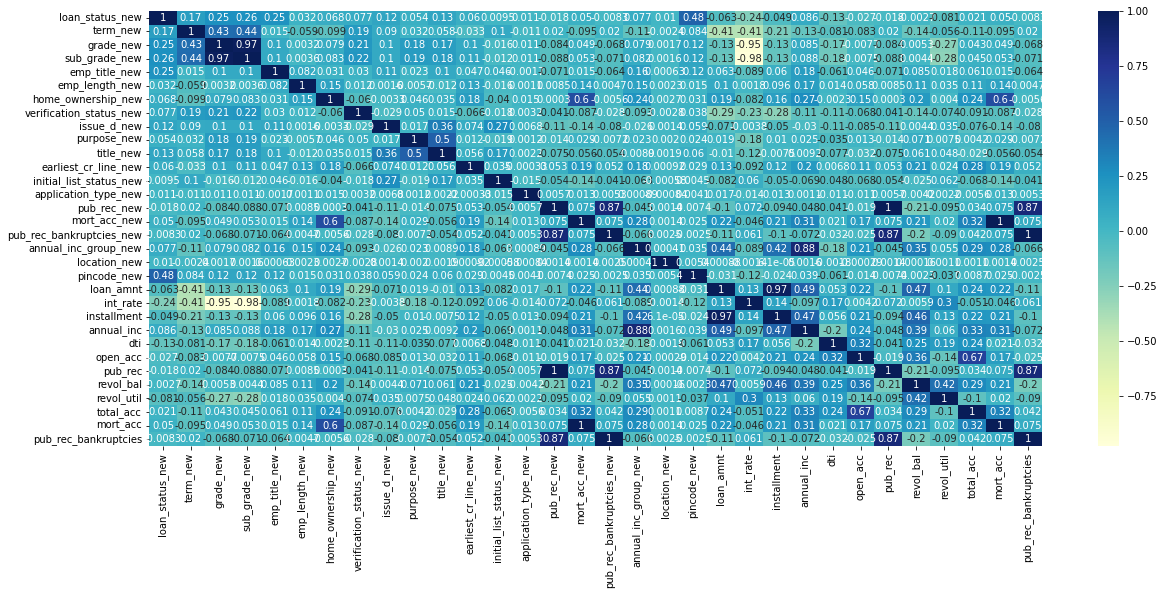

In [488]:
plt.figure(figsize=(20,8))
ax = sns.heatmap(df_selected.corr(method='spearman'), cmap="YlGnBu", annot=True)

### Visual Analysis (Part 2)

### Check distributions across groups (Independent features)

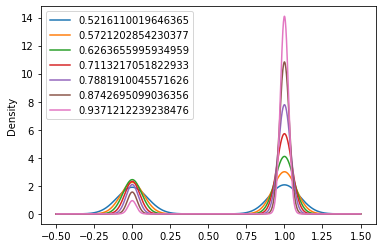

In [489]:
df.groupby('grade_new')['loan_status_new'].plot.density();
plt.legend();

- **Insights** : 
    - **Group Distributions are not similar hence there is some significance of each group**
    - **Need to run more statistical methods to affirm level of significance**

<AxesSubplot:xlabel='grade', ylabel='count'>

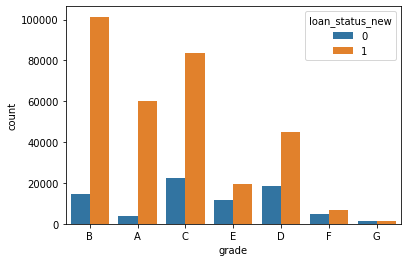

In [490]:
sns.countplot(data=df, x ="grade",hue='loan_status_new')

- **Insights**
    - **People with grades B or C or A or D are more likely to fully pay their loan**
    - Less number of "Fully Paid" loan when grade is G,F

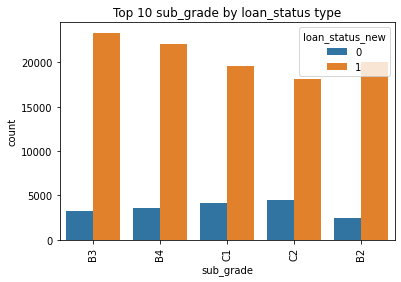

In [491]:
sp = sns.countplot(x="sub_grade",data=df,hue="loan_status_new",order=df.sub_grade.value_counts().iloc[:5].index)
sp.set(title='Top 10 sub_grade by loan_status type')
plt.xticks(rotation=90)
plt.show()

- **Insights**
    - Top 5 sub_grades for "Fully Paid" loan are B3,B4,B2,C1,C2

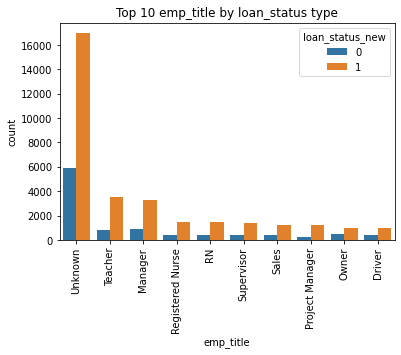

In [492]:
sp = sns.countplot(x="emp_title",data=df,hue="loan_status_new",order=df.emp_title.value_counts().iloc[:10].index)
sp.set(title='Top 10 emp_title by loan_status type')
plt.xticks(rotation=90)
plt.show()

- **Insights**
    - Top 3 emp_title for "Fully Paid" loan are Teacher,Manager, Registered Nurse

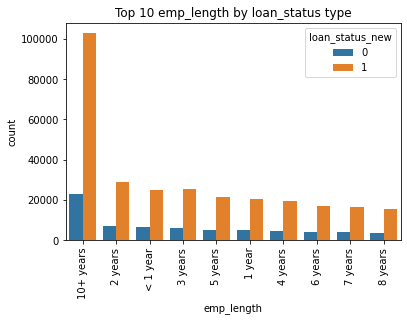

In [493]:
sp = sns.countplot(x="emp_length",data=df,hue="loan_status_new",order=df.emp_length.value_counts().iloc[:10].index)
sp.set(title='Top 10 emp_length by loan_status type')
plt.xticks(rotation=90)
plt.show()

- **Insights**
    - Most "Fully Paid" loan are for emp_length more than 10 years

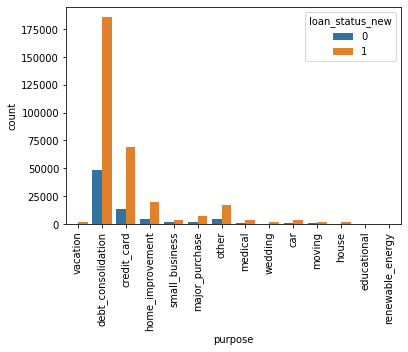

In [494]:
sns.countplot(data=df, x ="purpose",hue='loan_status_new')
plt.xticks(rotation=90)
plt.show()

- **Insights**
    - Most "Fully Paid" loan are for purpose debt_consolidation
    - Second highest "Fully Paid" loan are for credit_card

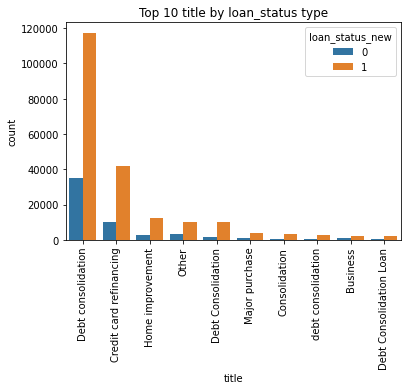

In [495]:
sp = sns.countplot(x="title",data=df,hue="loan_status_new",order=df.title.value_counts().iloc[:10].index)
sp.set(title='Top 10 title by loan_status type')
plt.xticks(rotation=90)
plt.show()

- **Insights**
    - Most "Fully Paid" loan are for title debt_consolidation
    - Second highest "Fully Paid" loan are for credit card refinancing 

### Data preparation for modeling

#### Missing Value Treatment (Part 2)

In [496]:
#### Numerical missing value treatment - KNN Imputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(missing_values = np.nan, n_neighbors=7)
df_selected = pd.DataFrame(imputer.fit_transform(df_selected),columns = df_selected.columns)

In [497]:
percent_missing = df_selected.isnull().sum() * 100 / len(df_selected)
missing_value_df = pd.DataFrame({'column_name': df_selected.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False)

,column_name,percent_missing
loan_status_new,loan_status_new,0.0
term_new,term_new,0.0
mort_acc,mort_acc,0.0
total_acc,total_acc,0.0
revol_util,revol_util,0.0
revol_bal,revol_bal,0.0
pub_rec,pub_rec,0.0
open_acc,open_acc,0.0
dti,dti,0.0
annual_inc,annual_inc,0.0


In [498]:
selected_X = ['term_new', 'grade_new', 'sub_grade_new',
       'emp_title_new', 'emp_length_new', 'home_ownership_new',
       'verification_status_new', 'issue_d_new', 'purpose_new', 'title_new',
       'earliest_cr_line_new', 'initial_list_status_new',
       'application_type_new', 'pub_rec_new', 'mort_acc_new',
       'pub_rec_bankruptcies_new', 'annual_inc_group_new', 'location_new',
       'pincode_new', 'loan_amnt', 'int_rate', 'installment', 'annual_inc',
       'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies']
selected_Y = ['loan_status_new']

In [499]:
df_X = df_selected[selected_X]
df_Y = df_selected[selected_Y]

In [500]:
from sklearn.model_selection import train_test_split

X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(df_X, df_Y, test_size=0.2, random_state=4)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=4)
X_train.shape

(237618, 31)

#### Scaling data

In [501]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

## Model building

### Base Model

In [502]:
y_train = np.ravel(y_train)
y_train.shape

(237618,)

In [503]:
y_train_shaped = np.ravel(y_train)

In [504]:
from sklearn.linear_model import LogisticRegression
weights = {0:4, 1:1} # Adjusted Class Weights to deal with imbalance class 
model = LogisticRegression(class_weight=weights) # C = 1, lambda = 1
model.fit(X_train, y_train_shaped)

LogisticRegression(class_weight={0: 4, 1: 1})

In [505]:
model.coef_

array([[ 2.20779720e-01,  1.62844747e-02,  6.27636893e-02,
         7.52604799e-01,  6.03477364e-02,  9.88542115e-02,
         3.91251075e-02,  2.25343252e-01, -3.80284315e-02,
         3.44714567e-01,  6.54754793e-02, -9.48439491e-02,
         1.70450895e-02, -1.87303147e-02,  3.62471784e-02,
         2.86507239e-02,  1.09448128e-01,  3.72453162e-02,
         9.88287223e+00, -5.87753210e-02, -3.38912554e-01,
        -3.65981717e-02,  7.59708078e-03, -1.42850519e-01,
        -1.35532348e-01, -1.87303147e-02,  4.90076434e-02,
        -1.47496967e-01,  8.19492193e-02,  3.62471784e-02,
         2.86507239e-02]])

In [506]:
model.intercept_

array([0.36402609])

In [507]:
print(f'Train Accuracy:{model.score(X_train,y_train)}, Val Accuracy:{model.score(X_val,y_val) }' ) 

Train Accuracy:0.8379331532122988, Val Accuracy:0.8378784435522562


#### Tunning hyperparameter lamda (best value)

In [508]:
from sklearn.pipeline import make_pipeline
train_scores = []
val_scores = []
scaler = StandardScaler()
for la in np.arange(0.01, 12000.0, 100): # range of values of Lambda
  scaled_lr = make_pipeline( scaler, LogisticRegression(C=1/la))
  scaled_lr.fit(X_train, y_train)
  train_score = scaled_lr.score(X_train, y_train)
  val_score = scaled_lr.score(X_val, y_val)
  train_scores.append(train_score)
  val_scores.append(val_score)

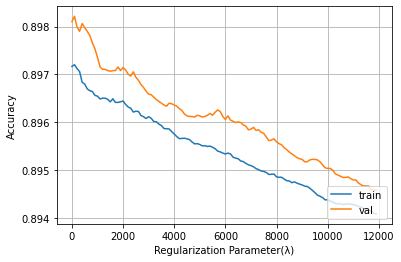

In [509]:
plt.figure()
plt.plot(list(np.arange(0.01, 12000.0, 100)), train_scores, label="train")
plt.plot(list(np.arange(0.01, 12000.0, 100)), val_scores, label="val")
plt.legend(loc='lower right')

plt.xlabel("Regularization Parameter(λ)")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

In [510]:
np.argmax(val_scores)

1

In [511]:
val_scores[np.argmax(val_scores)]

0.8982147817084565

In [512]:
l_best = 0.01 * np.argmax(val_scores) * 100
l_best

1.0

In [513]:
scaled_lr = make_pipeline( scaler, LogisticRegression(C=1/l_best))
scaled_lr.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [514]:
scaled_lr.named_steps['logisticregression'].coef_

array([[ 0.22383435,  0.02974726,  0.09016471,  0.67808865,  0.06745066,
         0.10572985,  0.04393254,  0.21953168, -0.04489926,  0.33998448,
         0.06472746, -0.09059823,  0.01490427, -0.01735841,  0.03356755,
         0.02760729,  0.10372877,  0.03488033,  8.88305118, -0.03382624,
        -0.27510512, -0.06035611,  0.01351727, -0.14036787, -0.13986827,
        -0.01735841,  0.05608629, -0.15013659,  0.08361839,  0.03356755,
         0.02760729]])

In [515]:
scaled_lr.named_steps['logisticregression'].intercept_

array([1.7376935])

In [516]:
test_score = scaled_lr.score(X_test,y_test)
print(test_score)

0.8993258086508598


In [517]:
scaled_lr.named_steps['logisticregression'].intercept_

array([1.7376935])

In [518]:
len(selected_X)

31

### Feature Importance

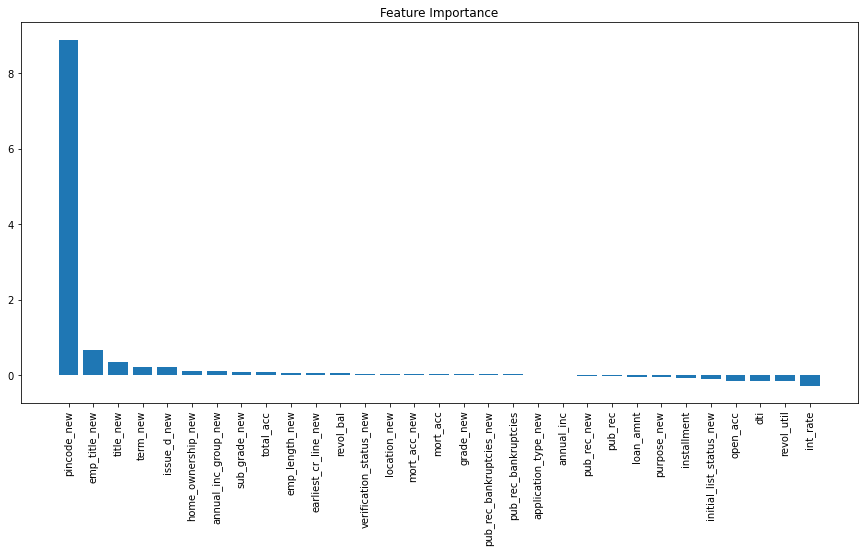

In [519]:
importances = scaled_lr.named_steps['logisticregression'].coef_[0]
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [selected_X[i] for i in indices] # Rearrange feature names so they match the sorted feature importances

plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

- **Conclusion**:
    - Following **features that heavily affected the outcome**
        - **pincode**
        - **emp_title**
        - **title_new**
        - **term_new**
        - **home_ownership**
        - **annual_inc_group**
    - **The loan_sttaus will  be affected by geographical location**

### Model Performance Evaluation

- **Results Evaluation**:
    - Classification Report - Precision , Recall , f1-score
    - Precision recall curve
    - Precision-Recall AUC

In [520]:
# AU - ROC doesn't work well on extremely imbalanced data.
# However, we saw that Precision, recall and F1 score work well on highly imbalanced data.

In [521]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import f1_score

In [522]:
y_test.shape

(79206, 1)

In [523]:
y_test = np.ravel(y_test)
y_test.shape

(79206,)

In [524]:
y_pred = scaled_lr.named_steps['logisticregression'].predict(X_test)
y_pred.shape

(79206,)

#### Precision - the number of correct positive predictions made

In [525]:
# Precision=True Positives/ (True Positives+False Positives)

from sklearn.metrics import precision_score
precision_score = precision_score(y_test, y_pred)
precision_score

0.9018522246829072

#### Recall

In [526]:
# Recall is a metric that quantifies the number of correct positive predictions made out of all positive predictions that 
# could have been made.

# Recall=True Positives / (True Positives+False Negatives)

from sklearn.metrics import recall_score
recall_score = recall_score(y_test, y_pred)
recall_score

0.9820080799223325

- **Conclusion** 
    - The gap in precision and recall affect the bank to balance between revenues(with high precision) and minimizing NPA 

#### F1-Score - the harmonic mean between precision and recall

In [527]:
# f1_score =  2*((precision*recall)/(precision+recall))
# For f1_score - Equal weightage is given to both precision and recall
cal_f1_score =  f1_score(y_test, y_pred)
cal_f1_score

0.9402248875562219

In [528]:
y_pred_prob = scaled_lr.named_steps['logisticregression'].predict_proba(X_test)[:,1]
y_pred_prob

array([7.95954523e-01, 9.19409701e-01, 2.71781263e-01, ...,
       9.99957780e-01, 5.53626812e-12, 9.99939753e-01])

#### Precison - Recall AUC (Imbalance Target Class)

In [529]:
precision, recall, thr = precision_recall_curve(y_test, y_pred_prob)

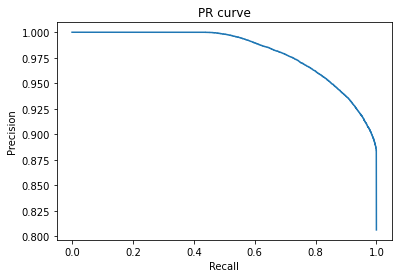

In [530]:
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve')
plt.show()

In [531]:
auc(recall, precision)

0.981579827328011

- **Conclusion** 
    - As AUC score is close to 1 , it's a **good model**
    - We are more concerned about False Negatives (i.e. no incorrect prediction of defaulter) and True positive (i.e. more revenues with correct predicton of lenders)
    - Hence Thinking from a **bank's perspective, the primary focus should be on recall**
    

#### F2 Score

In [532]:
# When it is more important to optimise recall than precision
# More weightage to recall 
f2_score= 5 * precision_score * recall_score/((4*precision_score)+recall_score)
f2_score

0.9648569476839003

- **IF classes are imbalanced**:
    - If we are more concerned about False positive and true positive, then we use precision.
    - If we are more concerned about False Negatives and True positive then we use recall.
    - F1 score is a balance between precision and recall.
    - If our concern is both classes (true negative and true positive) then we use ROC_AUC
    - If severe imbalance : PR AUC

### Tradeoff Questions

- How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it.
    - We need to look for **high precision model**
- Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone
    - We need to look for **high recall model**

### Provide actionable Insights & Recommendations